In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
# path_to_testfile = "./instances_v2/instances/fpg-poly_0000000020_h1.instance.json"
#path_to_testfile = "./instances_v2/instances/socg60.instance.json"
path_to_testfile = "../instances/fpg-poly_0000000020_h2.instance.json"

with open(path_to_testfile) as testfile:
    polygon = json.load(testfile)

In [3]:
print(polygon['type'])
print(polygon['name'])
print(polygon['n'])
print(polygon['outer_boundary'])
print(polygon['holes'])
print(len(polygon['holes']))


CGSHOP2023_Instance
fpg-poly_0000000020_h2
29
[{'x': 191850806, 'y': 207276863}, {'x': 233102742, 'y': 118763799}, {'x': 409746058, 'y': 102221492}, {'x': 518170442, 'y': 145990133}, {'x': 658393154, 'y': 84033988}, {'x': 969944537, 'y': 312412941}, {'x': 1073741824, 'y': 27398453}, {'x': 1006306257, 'y': 249250792}, {'x': 972122497, 'y': 406678785}, {'x': 841172557, 'y': 554365113}, {'x': 602711995, 'y': 719961446}, {'x': 498647195, 'y': 529671996}, {'x': 385673579, 'y': 956170210}, {'x': 286048011, 'y': 834661731}, {'x': 119059789, 'y': 817096511}, {'x': 101820302, 'y': 714800549}, {'x': 43085140, 'y': 404568818}, {'x': 18786073, 'y': 316887810}, {'x': 0, 'y': 194728036}, {'x': 142609572, 'y': 0}]
[[{'x': 349623949, 'y': 227499932}, {'x': 359939980, 'y': 768422084}, {'x': 378607327, 'y': 267682836}], [{'x': 68249156, 'y': 418481519}, {'x': 178867385, 'y': 723985109}, {'x': 345167289, 'y': 859001776}, {'x': 278159008, 'y': 298820764}, {'x': 274224193, 'y': 136143764}, {'x': 252289409,

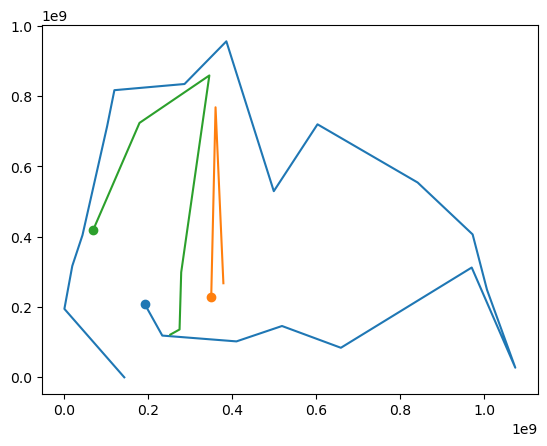

In [5]:
listpolygon = []
for pt in polygon['outer_boundary']:
    listpolygon.append([pt['x'], pt['y']])

listpolygon = np.array(listpolygon)

plt.plot(listpolygon.T[0], listpolygon.T[1])
# plt.scatter(listpolygon.T[0][1:], listpolygon.T[1][1:])
plt.scatter(listpolygon[0][0], listpolygon[0][1])

for hole in polygon['holes']:
    listhole = []
    for pt in hole:
        listhole.append([pt['x'], pt['y']])
    
    listhole = np.array(listhole)

    plt.plot(listhole.T[0], listhole.T[1])
    # plt.scatter(listhole.T[0][1:], listhole.T[1][1:])
    plt.scatter(listhole[0][0], listhole[0][1])

plt.show()



In [97]:
class Point:
    def __init__(self, x, y, parent, incoming, outgoing):
        self.coordinate = (x,y)
        self.parent = parent
        self.incoming = incoming
        self.outgoing = outgoing

#In case we still want a point class with only 1 list we can use this
class Point1List:
    def __init__(self, x, y, parent, adjacent):
        self.coordinate = (x,y)
        self.parent = parent
        self.adjacent = adjacent
        
class Edge:
    def __init__(self, pt1, pt2, parent):
        self.pt1 = pt1
        self.pt2 = pt2
        self.parent = parent

class Polygon:
    def __init__(self, isHole, points, edges, holes):
        self.isHole = isHole
        self.points = points
        self.edges = edges
        self.holes = holes

    def setholes(self, holes_new):
        self.holes = holes_new


In [152]:
#Creating outer boundary pts, edges, polygon
listpts = []
listpolygons = []
listedges = []
alledges = []
allpoints = []

#Create points + Edges
for pt in polygon['outer_boundary']:
    (x,y) = [pt['x'], pt['y']]
    #p = Point1List(x,y, None, [])
    p = Point(x,y, None, [], [])
    listpts.append(p)

counter = 0
for pt in listpts:
    e = Edge(listpts[counter].coordinate, listpts[counter-1].coordinate, None)
    listedges.append(e)
    alledges.append(e)
    counter +=1

#Update adjacent edges
z = len(listpts)
for i in range(z):
    #listpts[i].adjacent.append(listedges[i-1])
    listpts[i].incoming.append(listedges[i])
    if i < z-1:
        #listpts[i].adjacent.append(listedges[i+1])
        listpts[i].outgoing.append(listedges[i+1])
    else:
        listpts[i].outgoing.append(listedges[0])
        #listpts[i].adjacent.append(listedges[0])

allpoints = listpts

#Create polygon and update parent of points/vertices to be this polygon
poly = Polygon(0, listpts, listedges, None)
for edges in poly.edges:
    edges.parent = poly #Update edges parent
for pts in poly.points:
    pts.parent = poly #Update point parent

#Print checks to get items
#for element in poly.points:
#    print(element.coordinate, element.parent, (element.incoming[0].pt1, element.incoming[0].pt2), (element.outgoing[0].pt1, element.outgoing[0].pt2))

print("Basic (Outside) polygon has now", len(poly.edges), "Edges and", len(poly.points), "Points")


Basic (Outside) polygon has now 20 Edges and 20 Points


In [153]:
#Do the same for holes
counter = 0
if len(polygon['holes']) == 0:
    ishole = 0
else:
    ishole = 1

#If we have holes, we are allowed to do this part    
if ishole:

    length_holes = len(polygon['holes'])
    listholepolygons = []
    
    #We might get multiple holes, so 1 list per hole for the edges and points of a hole
    for ctr in range(length_holes):
        listholeedges = []
        listholepts = []
        
        #Points in hole
        length = len(polygon['holes'][ctr])
        for n in range(length):
            (xh,yh) = (polygon['holes'][ctr][n]['x'], polygon['holes'][ctr][n]['y'])
            #print((xh,yh))
            #p = Point1List(xh,yh, None, [])
            p = Point(xh,yh, None, [], [])
            listholepts.append(p)
        
        #Edges in hole
        counter = 0
        for pt in listholepts:
            e = Edge(listholepts[counter].coordinate, listholepts[counter-1].coordinate, None)
            #print("EDGE Added:", e.pt1, e.pt2)
            listholeedges.append(e)
            alledges.append(e)
            counter +=1

        #adjacent edges of a point
        z = len(listholepts)
        for i in range(z):
            #listholepts[i].adjacent.append(listholeedges[i])
            listholepts[i].incoming.append(listholeedges[i])
            if i < z-1:
                #listholepts[i].adjacent.append(listholeedges[i+1])
                listholepts[i].outgoing.append(listholeedges[i+1])
            else:
                listholepts[i].outgoing.append(listholeedges[0])
                #listholepts[i].adjacent.append(listedges[0])
              
        counter = 0
        h = Polygon(1, listholepts, listholeedges, None)
        #Update all edges and points to make sure that the parent is set to this hole
        for edges in h.edges:
            edges.parent = h #Update edges parent
        for pts in h.points:
            pts.parent = h #Update point parent
            allpoints.append(pts)

        #append hole to list
        listholepolygons.append(h)
        
    #add all holes we created in the main polygon
    poly.setholes(listholepolygons)
    #print(len(poly.holes))

    print("Updated (Outside + Holes) polygon has now", len(allpoints), "Edges and", len(poly.points), "Points, Including", len(poly.holes), "Holes")
    #for element in poly.points:
    #    print(element.coordinate, element.parent, (element.incoming[0].pt1, element.incoming[0].pt2), (element.outgoing[0].pt1, element.outgoing[0].pt2))
    #for elem in range(len(alledges)):
    #    print(alledges[elem].pt1, alledges[elem].pt2)

Updated (Outside + Holes) polygon has now 29 Edges and 29 Points, Including 2 Holes


# Useful functions?

In [6]:
def pt2np(pt):
    return np.array([pt['x'], pt['y']])

In [7]:
#returns the orientation of p3 wrt line through p1 and p2
def orientation(p1, p2, p3):

    #vector from p1 to p2
    a = [(int(p2['x']) - int(p1['x'])), (int(p2['y']) - int(p1['y']))]
    #vector from p1 to p3
    b = [(int(p3['x']) - int(p1['x'])), (int(p3['y']) - int(p1['y']))]

    #cross product
    cross = int(a[0]) * int(b[1]) - int(a[1]) * int(b[0])

    if cross == 0: #colinear
        return 0
    else: #sign gives left or right of \bar{p1p2}
        return np.sign(cross)

In [8]:
def find_reflex(polygon):
    n = polygon['n']
    bdry = polygon['outer_boundary']
    holes = polygon['holes']
    count = 0
    reflex = []

    for i in range(len(bdry)):
        if orientation(bdry[(i-1)], bdry[i], bdry[(i+1) % len(bdry)]) == -1: reflex.append(bdry[i]); count += 1

    for hole in holes:
        for i in range(len(hole)):
            if orientation(hole[(i-1)], hole[i], hole[(i+1) % len(hole)]) == -1: reflex.append(hole[i]); count += 1

    return reflex, count

In [9]:
reflex, r = find_reflex(polygon)

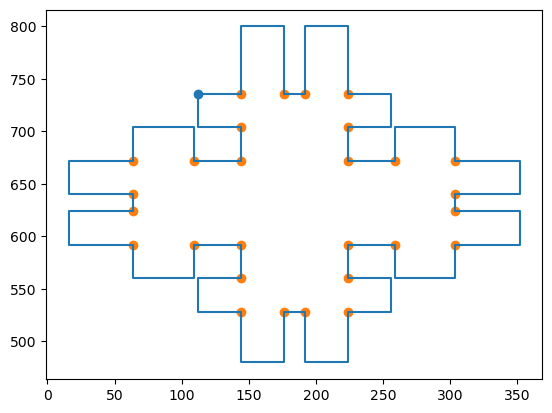

In [10]:
listpolygon = [[polygon['outer_boundary'][-1]['x'], polygon['outer_boundary'][-1]['y']]]
for pt in polygon['outer_boundary']:
    listpolygon.append([pt['x'], pt['y']])

listpolygon = np.array(listpolygon)

plt.plot(listpolygon.T[0], listpolygon.T[1])
# plt.scatter(listpolygon.T[0][1:], listpolygon.T[1][1:])
plt.scatter(listpolygon[1][0], listpolygon[1][1])

for hole in polygon['holes']:
    listhole = [[hole[-1]['x'], hole[-1]['y']]]
    for pt in hole:
        listhole.append([pt['x'], pt['y']])
    
    listhole = np.array(listhole)

    plt.plot(listhole.T[0], listhole.T[1])
    # plt.scatter(listhole.T[0][1:], listhole.T[1][1:])
    plt.scatter(listhole[1][0], listhole[1][1])

listreflex = []
for pt in reflex:
    listreflex.append([pt['x'], pt['y']])

listreflex = np.array(listreflex)

plt.scatter(listreflex.T[0], listreflex.T[1])

plt.show()